<a href="https://colab.research.google.com/github/AnshPunia26/Audio_classification/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.8.1 matplotlib
!pip install tensorflow_io==0.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 57.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing instal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import numpy

In [3]:
CAPUCHIN_FILE = os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Capuchinbird_Clips","XC114131-0.wav")
NOT_CAPUCHIN_FILE = os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Not_Capuchinbird_Clips", "afternoon-birds-song-in-forest-0.wav")

In [ ]:
os.path.exists(CAPUCHIN_FILE)

True

In [ ]:
os.path.exists(NOT_CAPUCHIN_FILE)

True

In [ ]:
import tensorflow_io as tfio

# Check if the library is loaded successfully
print(tfio.__version__)

0.23.1


In [ ]:
CAPUCHIN_FILE

'/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Capuchinbird_Clips/XC114131-0.wav'

In [ ]:
NOT_CAPUCHIN_FILE

'/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

In [4]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)
file_contents

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF$S\x07\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00\x80\xbb\x00\x00\x00\xee\x02\x00\x04\x00\x10\x00data\x00S\x07\x00[\x00\x9c\xff\xb2\x00A\x00\x9b\x00\xfb\x00u\x00y\x01u\x00l\x01L\x00\xf7\x00\x1f\x00\xa7\x00;\x00\xba\x00P\x00\x03\x01L\x00]\x01\x91\x00\x96\x01\xfa\x00\x7f\x01,\x01C\x01:\x01\x1d\x01.\x01\xfe\x00\xe8\x00\x0b\x01\x89\x00o\x01@\x00\xca\x01"\x00\xb4\x01:\x00?\x01f\x00\xac\x00\x9a\x00T\x00\xe8\x00\x86\x00\t\x01\xff\x00\xd1\x00B\x01\x99\x002\x01]\x00\xd9\x00\xc3\xff6\x00>\xff\x8e\xffV\xffO\xff\xa6\xff\x8e\xff\xdb\xff\x19\x00,\x00\xa5\x00w\x00\xbd\x00c\x00\x1b\x00\x0f\x006\xff\xb4\xff\xb3\xfee\xff\x9f\xfeC\xff\xbf\xfe]\xff\x02\xff\x85\xff?\xff{\xff/\xffC\xff\xd4\xfe-\xffk\xfeM\xff7\xfeb\xff\\\xfeq\xff\xb4\xfe\x98\xff\xdb\xfe\x81\xff\xa0\xfe\t\xffC\xfe\xa1\xfe\x06\xfe\x7f\xfe\xe5\xfd\x81\xfe\x00\xfe\xae\xfe\x8b\xfe\x02\xff/\xffN\xffc\xffu\xff1\xffd\xff\xde\xfe+\xffw\xfe\x17\xff@\xfe5\xff\x92\xfeH\xffJ\xffJ\xff\xfb\xffF\xffg\x00/\xff

In [ ]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
wav

<tf.Tensor: shape=(120000, 1), dtype=float32, numpy=
array([[ 0.0027771 ],
       [ 0.00543213],
       [ 0.00473022],
       ...,
       [-0.00341797],
       [-0.00366211],
       [-0.00689697]], dtype=float32)>

In [ ]:
wav = tf.squeeze(wav, axis=-1)
sample_rate = tf.cast(sample_rate, dtype=tf.int64)
wav
#wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)



<tf.Tensor: shape=(120000,), dtype=float32, numpy=
array([ 0.0027771 ,  0.00543213,  0.00473022, ..., -0.00341797,
       -0.00366211, -0.00689697], dtype=float32)>

In [ ]:
wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
wav

<tf.Tensor: shape=(40000,), dtype=float32, numpy=
array([-2.1452930e-08,  2.9903514e-08,  2.3691292e-08, ...,
        1.1810826e-02,  1.3428938e-02,  3.8246573e-03], dtype=float32)>

In [ ]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

In [ ]:
wave

<tf.Tensor: shape=(40000,), dtype=float32, numpy=
array([-2.1452930e-08,  2.9903514e-08,  2.3691292e-08, ...,
        1.1810826e-02,  1.3428938e-02,  3.8246573e-03], dtype=float32)>

In [ ]:
nwave

<tf.Tensor: shape=(48927,), dtype=float32, numpy=
array([ 0.        ,  0.        ,  0.        , ..., -0.00054067,
        0.02472705, -0.00794304], dtype=float32)>

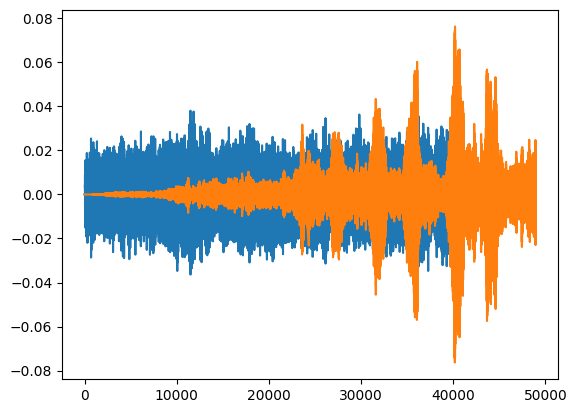

In [ ]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [ ]:
#POS = os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Capuchinbird_Clips")
#NEG = os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Not_Capuchinbird_Clips")

Create Tensorflow Datasets

In [ ]:
#os.path.exists(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Capuchinbird_Clips"))
#os.path.exists(NEG)

True

Add Labels and combine POS and NEG

In [ ]:
#pos = tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Capuchinbird_Clips")+'/*.wav')
#neg = tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Not_Capuchinbird_Clips")+'/*.wav')

In [ ]:
pos.as_numpy_iterator().next()


b'/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Capuchinbird_Clips/XC27882-1.wav'

In [ ]:
neg.as_numpy_iterator().next()

b'/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Not_Capuchinbird_Clips/corncrake-sound-0.wav'

In [5]:
#Add labels and adding flags as 0's and 1's on the data
positives = tf.data.Dataset.zip((tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Capuchinbird_Clips")+'/*.wav'), tf.data.Dataset.from_tensor_slices(tf.ones(len(tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Capuchinbird_Clips")+'/*.wav'))))))
negatives = tf.data.Dataset.zip((tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Not_Capuchinbird_Clips")+'/*.wav'), tf.data.Dataset.from_tensor_slices(tf.zeros(len(tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Not_Capuchinbird_Clips")+'/*.wav'))))))
data = positives.concatenate(negatives)

In [ ]:
#tf.ones(len(pos))
tf.zeros(len(tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Not_Capuchinbird_Clips")+'/*.wav')))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
positives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Capuchinbird_Clips/XC65196-1.wav',
 1.0)

In [ ]:
negatives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Not_Capuchinbird_Clips/killdeer-sound-6.wav',
 0.0)

In [ ]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/content/drive/MyDrive/audio_CLASSIFICATION/data/Parsed_Not_Capuchinbird_Clips/killdeer-sound-8.wav',
 0.0)

EDA(Length of the CAPUCHIN CALL)

In [ ]:
#os.listdir(POS)

In [ ]:
lengths = []
for file in os.listdir(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Capuchinbird_Clips")):
  tensor_wave = load_wav_16k_mono(os.path.join("/content/drive/MyDrive/audio_CLASSIFICATION/data", "Parsed_Capuchinbird_Clips", file))
  lengths.append(len(tensor_wave))

In [ ]:
lengths

[48000,
 40000,
 56000,
 48000,
 64000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 64000,
 56000,
 40000,
 48000,
 64000,
 56000,
 56000,
 64000,
 64000,
 64000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 40000,
 56000,
 64000,
 56000,
 40000,
 64000,
 32000,
 64000,
 64000,
 56000,
 48000,
 64000,
 56000,
 64000,
 48000,
 48000,
 48000,
 56000,
 48000,
 64000,
 48000,
 48000,
 56000,
 40000,
 56000,
 48000,
 40000,
 48000,
 40000,
 48000,
 48000,
 56000,
 56000,
 56000,
 48000,
 64000,
 72000,
 64000,
 56000,
 64000,
 56000,
 56000,
 40000,
 40000,
 56000,
 64000,
 64000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 48000,
 56000,
 40000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 40000,
 56000,
 64000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 64000,
 56000,
 48000,
 48000,
 64000,
 48000,
 48000,
 48000,
 56000,
 64000,
 48000,
 64000,
 48000,
 64000,
 56000,
 48000,
 64000,
 56000,
 56000,
 40000,
 55999,
 40000,


In [ ]:
#mean
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [ ]:
54156/16000

3.38475

In [ ]:
#min
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
#max
tf.math.reduce_max(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=80000>

Building Spectrogram

In [1]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label


In [ ]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav

<tf.Tensor: shape=(40000,), dtype=float32, numpy=
array([-2.1452930e-08,  2.9903514e-08,  2.3691292e-08, ...,
        1.1810826e-02,  1.3428938e-02,  3.8246573e-03], dtype=float32)>

In [ ]:
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
wav = tf.concat([zero_padding, wav],0)
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 0.        ,  0.        ,  0.        , ...,  0.00339449,
       -0.00982193, -0.00495472], dtype=float32)>

In [ ]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectrogram = tf.abs(spectrogram)

In [ ]:
spectrogram = tf.expand_dims(spectrogram, axis=2)

In [ ]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[6.0564861e-02],
        [6.5491959e-02],
        [6.8888441e-02],
        ...,
        [7.9551373e-06],
        [5.6164231e-07],
        [3.9767474e-06]],

       [[4.3328494e-02],
        [5.7293594e-02],
        [6.8963304e-02],
        ...,
        [5.2206765e-06],
        [5.2362138e-06],
        [3.8761646e-06]],

       [[1.4917079e-02],
        [4.4007882e-02],
        [6.0938261e-02],
        ...,
        [2.4461533

In [ ]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)

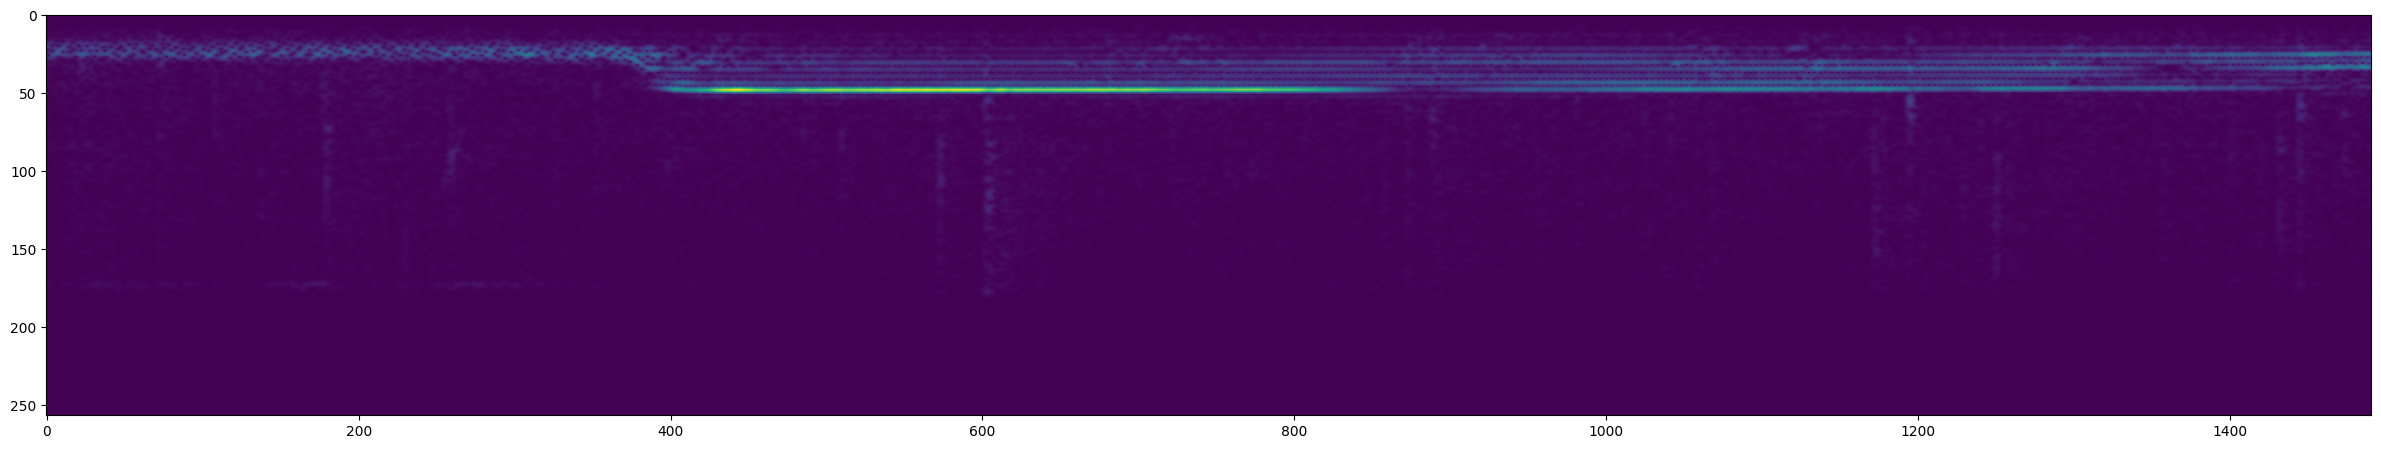

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [ ]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)

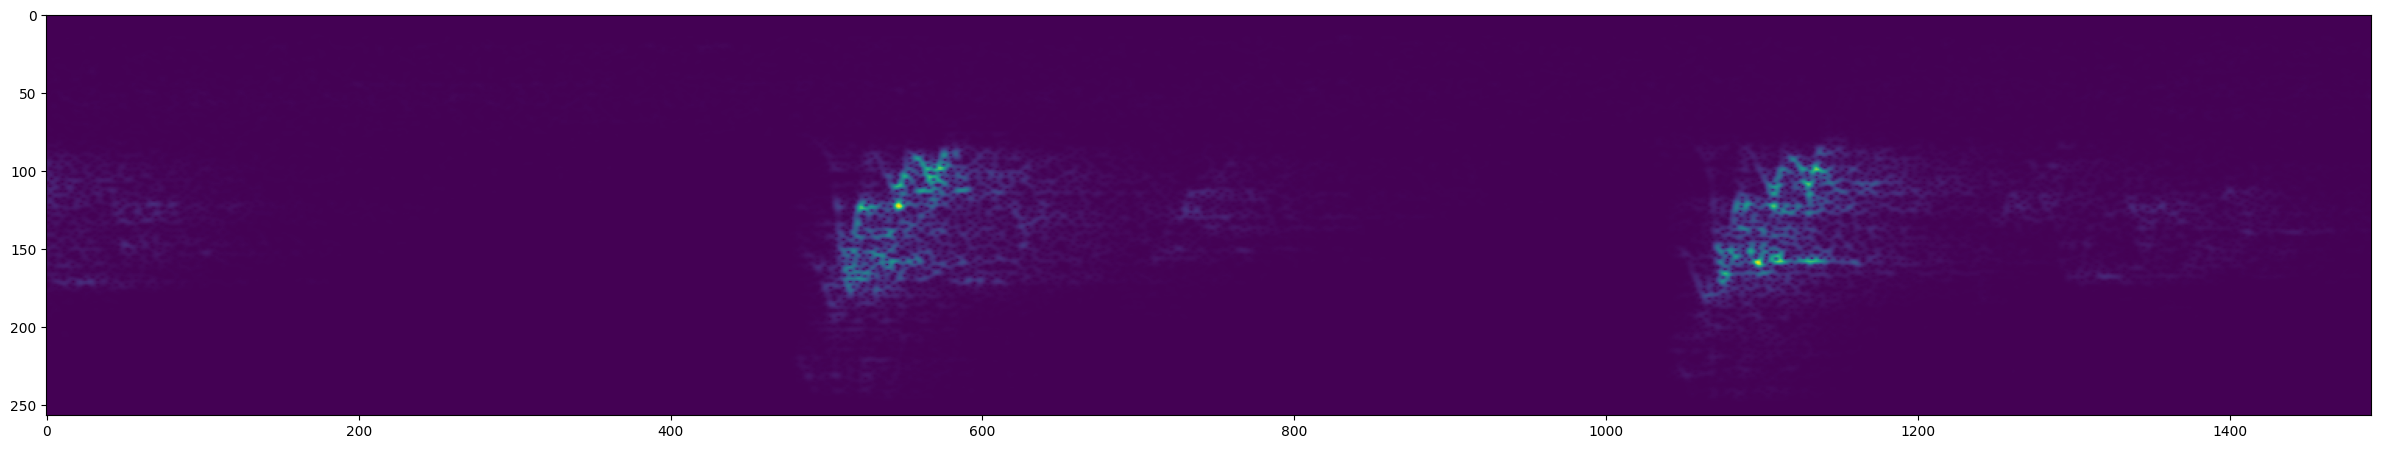

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

Create tensorflow pipeline


In [7]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(5)
data = data.prefetch(10)

In [7]:
len(data)

162

In [8]:
train = data.take(100)
test = data.skip(100).take(62)

In [12]:
#samples, labels = train.as_numpy_iterator().next()

In [10]:
samples.shape

(5, 1491, 257, 1)

In [ ]:
labels

array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

MODEL BUILDING

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [11]:
model = Sequential()
model.add(Conv2D(10, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(10, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 10)     100       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 10)     910       
                                                                 
 flatten (Flatten)           (None, 3762110)           0         
                                                                 
 dense (Dense)               (None, 128)               481550208 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 481,551,347
Trainable params: 481,551,347
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4


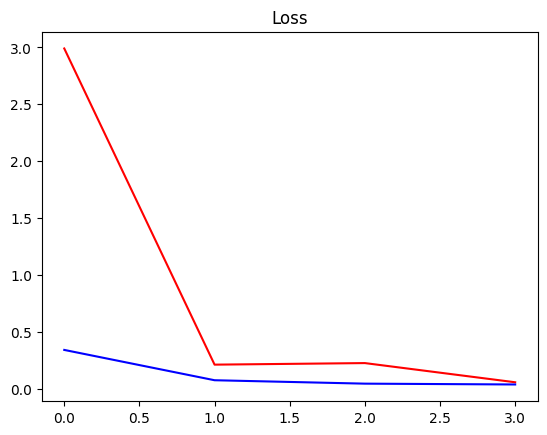

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

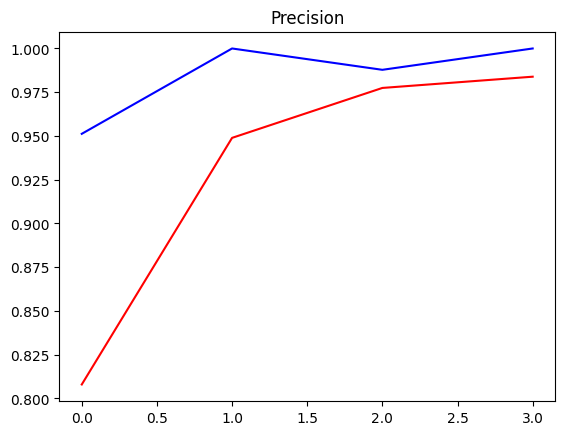

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

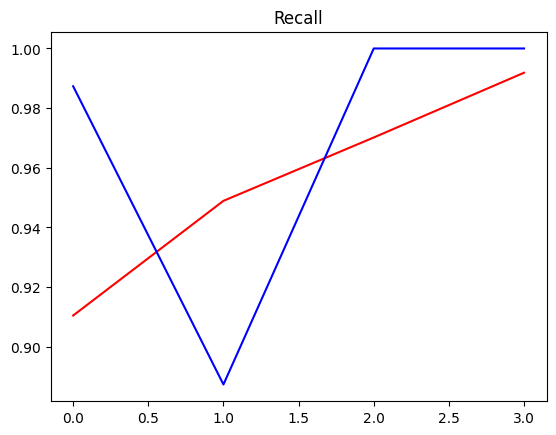

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

Get next Batch and prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
X_test

array([[[[2.32727490e-02],
         [1.05968080e-02],
         [2.85644121e-02],
         ...,
         [9.61990663e-05],
         [5.68653850e-05],
         [1.66930258e-05]],

        [[3.19613367e-02],
         [3.19776051e-02],
         [3.60293128e-02],
         ...,
         [1.01004996e-04],
         [5.30282596e-05],
         [1.93715096e-06]],

        [[4.89771515e-02],
         [4.82036434e-02],
         [4.08385769e-02],
         ...,
         [1.13640352e-04],
         [4.23532838e-05],
         [7.76350498e-06]],

        ...,

        [[6.36451095e-02],
         [6.03446141e-02],
         [5.36130555e-02],
         ...,
         [1.67566133e-04],
         [7.17126823e-05],
         [1.66520476e-06]],

        [[3.98024321e-02],
         [3.24619934e-02],
         [2.89291926e-02],
         ...,
         [1.12569476e-04],
         [7.29728417e-05],
         [2.65091658e-05]],

        [[1.70184746e-02],
         [1.36265550e-02],
         [6.24761172e-03],
         ...,
 

In [ ]:
X_test.shape

(8, 1491, 257, 1)

In [ ]:
y_test.shape

(8,)

In [ ]:
yhat = model.predict(X_test)

In [ ]:
yhat

array([[4.0101109e-26],
       [8.8894058e-15],
       [9.3522860e-33],
       [2.2651277e-05],
       [4.8087706e-24],
       [2.2087660e-24],
       [1.8350354e-14],
       [4.1803410e-12]], dtype=float32)

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
yhat

[0, 0, 0, 0, 0, 0, 0, 0]